# Mobile inverted pendulum python dynamics
author:SeongHyeon Kim

program:PYDY balancing robot simulator


필요한 라이브러리 포함


In [75]:
from sympy import sin, cos, symbols, solve, Matrix, init_printing
from sympy.physics.mechanics import *
from sympy.physics.vector import ReferenceFrame
import sympy.physics.mechanics as me
import sympy as sm
import math as m
import numpy as np


In [76]:
init_vprinting()

# Reference frames

N은 외부의 기준 프레임. 속도를 0으로

In [108]:
#Newtonian reference frame
N=ReferenceFrame('N')

# Define a world coordinate origin
No = Point('No')
No.set_vel(N, 0)

변수선언

In [109]:
#Robot heading Frame
F = N.orientnew('F', 'Axis',[psi, N.z] )

# Robot Reference Frame(Center of mass)
P = F.orientnew('P', 'Axis', [theta, F.y])

기준프레임.dcm(상대프레임)

In [110]:
N.dcm(F)

⎡cos(ψ)  -sin(ψ)  0⎤
⎢                  ⎥
⎢sin(ψ)  cos(ψ)   0⎥
⎢                  ⎥
⎣  0        0     1⎦

In [111]:
F.dcm(P)

⎡cos(θ)   0  sin(θ)⎤
⎢                  ⎥
⎢   0     1    0   ⎥
⎢                  ⎥
⎣-sin(θ)  0  cos(θ)⎦

## Newtonian, Bodies, Frames, Particles, Points


In [130]:
body_p_cm = me.Point('p_cm')
body_p_f = me.ReferenceFrame('p_f')
body_p = me.RigidBody('p', body_p_cm, body_p_f, sm.symbols('m'), (me.outer(body_p_f.x,body_p_f.x),body_p_cm))
body_l_cm = me.Point('l_cm')
body_l_f = me.ReferenceFrame('l_f')
body_l = me.RigidBody('l', body_l_cm, body_l_f, sm.symbols('m'), (me.outer(body_l_f.x,body_l_f.x),body_l_cm))
body_r_cm = me.Point('r_cm')
body_r_f = me.ReferenceFrame('r_f')
body_r = me.RigidBody('r', body_r_cm, body_r_f, sm.symbols('m'), (me.outer(body_r_f.x,body_r_f.x),body_r_cm))
frame_f = me.ReferenceFrame('f')
I = me.Point('i')
LN = me.Point('ln')
RN = me.Point('rn')



## Variables, Constants and Specified

In [148]:
x = me.dynamicsymbols('x')
xd = me.dynamicsymbols('x', 1)
xd2 = me.dynamicsymbols('x', 2)
theta = me.dynamicsymbols('theta')
thetad = me.dynamicsymbols('theta', 1)
thetad2 = me.dynamicsymbols('theta', 2)
delta = me.dynamicsymbols('delta')
deltad = me.dynamicsymbols('delta', 1)
deltad2 = me.dynamicsymbols('delta', 2)
wL = me.dynamicsymbols('wL')
wLd = me.dynamicsymbols('wL', 1)
wLd2 = me.dynamicsymbols('wL', 2)
wR = me.dynamicsymbols('wR')
wRd = me.dynamicsymbols('wR', 1)
wRd2 = me.dynamicsymbols('wR', 2)
tl, tr = me.dynamicsymbols('tL tR')
g = sm.symbols('g', real=True)
d = sm.symbols('d', real=True)
R = sm.symbols('R', real=True)
L = sm.symbols('L', real=True)

## Position vectors

P_No_I = x*F.x    # Point No to I
P_I_Po = l*P.z    # Point I to mass center of P
P_I_Lo = d*F.y    # Point I to center of wheel L
P_I_Ro = -d*F.y   # Point I to center of wheel R
P_Lo_LN = -R*F.z   # Center of wheel L to contact point LN
P_Ro_RN = -R*F.z   # Center of wheel R to contact point RN

In [149]:
I = No.locatenew('I', x*F.x)      # Point No to I

Po = I.locatenew('Po', l*P.z)     # Point I to mass center of P

Lo = I.locatenew('Lo', d*F.y)     # Point I to center of wheel L

Ro = I.locatenew('Ro', -d*F.y)    # Point I to center of wheel R

LN = Lo.locatenew('LN', -R*F.z)   # Center of wheel L to contact point LN

RN = Ro.locatenew('RN', -R*F.z)   # Center of wheel R to contact point RN

## Angular Velocities


In [150]:
F.set_ang_vel(N, deltad*N.z)        # Angular velocity of F in N
P.set_ang_vel(F, thetad*F.y)        # Angular velocity of P in F
body_l_f.set_ang_vel(F, wLd*F.y)    # wL is related to w and v due to rolling
body_r_f.set_ang_vel(F, wRd*F.y)    # wR is related to w and v due to rolling

## Velocities of relevant points

In [167]:
V_I_N = I.set_vel(N, xd*F.x)            # Velocity of point I in N

V_PO_N = Po.v2pt_theory(I,N,P)           # Velocity of center of mass of P

V_LO_N = Lo.v2pt_theory(I, N,P,)         # Velocity of center of L

V_RO_N = Ro.v2pt_theory(I,N,P)           # Velocity of center of R

V_LN_N = LN.v2pt_theory(Lo,N,body_l_f)          # Velocity of contact point of L

V_RN_N = RN.v2pt_theory(Ro,N,body_r_f)          # Velocity of contact point of R

V_LN_N

## Motion Constraints (relates wL and wR to w and v)


In [171]:
 D1 = dot(V_LN_N, F.x)     #Rolling without slipping condition of L
    
# Dependent[1] = x' - d*delta' - R*wL'
 D2 = dot(V_RN_N, F.x)    #Rolling without slipping condition of R

 #Dependent[2] = x' + d*delta' - R*wR'
 D2
 

In [175]:
#Constrain(Dependent[wLd,wRd])
wLd = (xd-d*deltad)/R
wRd = (xd+d*deltad)/R
wLd2 = (xd2-d*deltad2)/R
wRd2 = (xd2+d*deltad2)/R


### Forces

In [ ]:
Gravity(-g*N3>)
FORCE_LO> = -g*M*N3>
FORCE_PO> = -g*Mp*N3>
FORCE_RO> = -g*M*N3>
Torque(P/L, TL*F2>)
 % Torques on L
TORQUE_L> = TL*F2>
 TORQUE_P> = -TL*F2>
) Torque(P/R, TR*F2>)
 % Torques on R
 TORQUE_R> = TR*F2>
 TORQUE_P> = (-TL-TR)*F2>
) %-----------------------------------------------------------------------------------


## Body variables

바퀴간 거리, 질량, 관성모멘트

In [10]:
#Constants for the Robot body
d = symbols('d')                                       #Distance from Front wheel to Rear wheel
m_b = symbols('m_b')                                   #Mass of the body
Ixx, Iyy, Izz = symbols('Ixx, Iyy, Izz')               #Moments of inertia of body

P는 로봇의 무게중심기준계.F는 로봇 방향 기준계. Ff는 앞바퀴의 기준계.

Ff의 속도 설정 diff() 는 미분을 의미한다.

In [11]:
# Front wheel Point
Ff = O.locatenew('Ff', x*H.x)

# Set the velocity of point Ff
Ff.set_vel(N, dx*H.x)

# Modeling Wheel (Joints)

## Wheel Frames & Angular Velocities

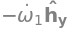

In [12]:
# Create reference frames for wheels
Wf = H.orientnew('Wf', 'Axis', [omega1, H.y])
Wr = H.orientnew('Wr', 'Axis', [omega2, H.x])

H.ang_vel_in(Wf)

바퀴위치, 바퀴회전, 바퀴의 프레임 선언, 바퀴 강체선언


기준.locatenew('이름', 이동*단위백터)


In [13]:
# Points of front wheel
F_wheel = Ff.locatenew('F_wheel', 0)
R_wheel= Ff.locatenew('R_wheel', d*H.x)

In [14]:
# Create rigid bodies for wheels
Wheel_f = RigidBody('Wheel_f', F_wheel, Wf, m_wf, (Iw_f, F_wheel))
Wheel_r = RigidBody('Wheel_r', R_wheel, Wr, m_wr, (Iw_r, R_wheel))

## Modeling body

In [15]:
# Calculate inertia of body
Ib = inertia(H, Ixx, Iyy, Izz)

# Center of mass of body
CoM_x, CoM_z=symbols('M_x, M_z')

#Point Center of mass
Cm = Ff.locatenew('Cm', CoM_x*H.x + CoM_z*H.z)  #CoM 몸체 위치

# Create a rigid body object for body
Body = RigidBody('Body', Cm, P, m_b, (Ib, Cm))

# Kinematical Differential Equations

In [16]:
kinematical_differential_equations = [dx - x.diff(),
                                      dtheta - theta.diff(),
                                      dpsi - psi.diff()]
kinematical_differential_equations

# 입력 속도

In [17]:
H.set_ang_vel(N, dpsi*N.z )

In [18]:
P.set_ang_vel(H, dtheta*H.x)

### 각각의 각속도 (손풀이랑 같음)

In [19]:
#Yaw 각속도
N.ang_vel_in(H)

In [20]:
#몸체 각속도
N.ang_vel_in(P)

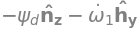

In [21]:
#앞바퀴 각속도
N.ang_vel_in(Wf)

In [22]:
#뒷바퀴 각속도
N.ang_vel_in(Wr)

### 각각의 Mass center 에서의 속도


v2pt_theory는 선속도를 의미


$$^I\mathbf{v}^{P_2} = ^I\mathbf{v}^{P_1} + ^I\omega^A \times \mathbf{r}^{\frac{P_2}{P_1}}$$

The `Point.v2pt_theory()` method makes it easy to do this calculation.

측정점.v2pt_theory(회전 중심점, 관찰틀, 회전틀(돌아가는 애))

In [23]:
#앞바퀴의 선속도
F_wheel.v2pt_theory(Ff, N, Wf)

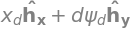

In [24]:
#뒷바퀴의 선속도
R_wheel.v2pt_theory(Ff, N, Wr)

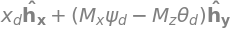

In [25]:
#몸의 질량중심의 속도
Cm.v2pt_theory(Ff, N, P)

### 토크와 힘 작용

# Equation of motion include Motor Dynamics

In [26]:
Kt_r, Kt_f = symbols('Kt_r, Kt_f')     #motor torque constant

In [27]:
I_r, I_f = symbols('I_r, I_f')       #motor amp

In [28]:
#중력벡터
Gravity = -m_b * g * N.z

In [29]:
#모터 토크선언
F_torque, R_torque = dynamicsymbols('tau_f, tau_r')

In [30]:
F_torque = Kt_f * I_f

In [31]:
R_torque = Kt_r * I_r

In [32]:
#토크벡터 (바퀴>몸체로 전달하는 토크)
motor_F = F_torque/R_f * H.y
motor_R = R_torque/R_r * H.x

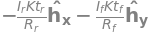

In [33]:
Body_torque = -(motor_F + motor_R)
Body_torque

In [34]:
Cm_grav_force = (Cm, Gravity)

In [35]:
Fwheel_torque = (Wf, motor_F)

In [36]:
Rwheel_torque = (Wr, motor_R)

In [37]:
Body_torque = (P, Body_torque)

# 운동방정식으로 만들자

## Generalized Forces

[토크힘] x [속도,각속도]

[Cm속도, 앞바퀴각속도, 뒷바퀴각속도, 몸체 각속도] x [중력, 앞바퀴토크, 뒷바퀴토크, Cm토크] 

VnWxTnF

In [38]:
from __future__ import print_function, division

In [39]:
from sympy import trigsimp
from sympy.physics.mechanics import KanesMethod

In [40]:
from sympy.physics.vector import init_vprinting

In [41]:
q = [x, theta, psi]
q

In [42]:
dq = [dx,dtheta, dpsi]
dq

In [43]:
kane = KanesMethod(N, q, dq, kinematical_differential_equations)

In [44]:
loads = [Cm_grav_force,
        Fwheel_torque,
        Rwheel_torque,
        Body_torque]
loads

[(Cm, - g*m_b*N.z),
 (Wf, I_f*Kt_f/R_f*H.y),
 (Wr, I_r*Kt_r/R_r*H.x),
 (P, - I_r*Kt_r/R_r*H.x - I_f*Kt_f/R_f*H.y)]

In [45]:
bodies = [Body, Wheel_f, Wheel_r]
bodies

[Body, Wheel_f, Wheel_r]

In [46]:
fr, frstar = kane.kanes_equations(bodies, loads)

### F + F* =0 식 (Kanes equation)

In [47]:
trigsimp(fr + frstar)

⎡                   2                                                         
⎢         d⋅m_wr⋅ψ_d  + m_b⋅(Mₓ⋅ψ_d - M_z⋅θ_d)⋅ψ_d - (m_b + m_wf + m_wr)⋅x_̇d 
⎢                                                                             
⎢           Iᵣ⋅Ktᵣ                                      ⎛         2    ⎞      
⎢         - ────── + Mₓ⋅M_z⋅m_b⋅ψ_̇d + M_z⋅m_b⋅ψ_d⋅x_d - ⎝Ixx + M_z ⋅m_b⎠⋅θ_̇d
⎢             Rᵣ                                                              
⎢                                                                             
⎢                                                   ⎛        2        2       
⎣Mₓ⋅M_z⋅m_b⋅θ_̇d - Mₓ⋅m_b⋅ψ_d⋅x_d - d⋅m_wr⋅ψ_d⋅x_d - ⎝Izz + Mₓ ⋅m_b + d ⋅m_wr 

        ⎤
         ⎥
        ⎥
        ⎥
          ⎥
        ⎥
        ⎥
   ⎞    ⎥
+ 10⎠⋅ψ_̇d⎦

In [48]:
mass_matrix = trigsimp(kane.mass_matrix_full)
mass_matrix

⎡1  0  0          0                0                      0              ⎤
⎢                                                                        ⎥
⎢0  1  0          0                0                      0              ⎥
⎢                                                                        ⎥
⎢0  0  1          0                0                      0              ⎥
⎢                                                                        ⎥
⎢0  0  0  m_b + m_wf + m_wr        0                      0              ⎥
⎢                                                                        ⎥
⎢                                     2                                  ⎥
⎢0  0  0          0          Ixx + M_z ⋅m_b          -Mₓ⋅M_z⋅m_b         ⎥
⎢                                                                        ⎥
⎢                                                    2        2          ⎥
⎣0  0  0          0           -Mₓ⋅M_z⋅m_b    Izz + Mₓ ⋅m_b + d ⋅m_wr + 10⎦

In [49]:
forcing_vector = trigsimp(kane.forcing_full)
forcing_vector

⎡                  x_d                   ⎤
⎢                                        ⎥
⎢                  θ_d                   ⎥
⎢                                        ⎥
⎢                  ψ_d                   ⎥
⎢                                        ⎥
⎢          2                             ⎥
⎢d⋅m_wr⋅ψ_d  + m_b⋅(Mₓ⋅ψ_d - M_z⋅θ_d)⋅ψ_d⎥
⎢                                        ⎥
⎢         Iᵣ⋅Ktᵣ                         ⎥
⎢       - ────── + M_z⋅m_b⋅ψ_d⋅x_d       ⎥
⎢           Rᵣ                           ⎥
⎢                                        ⎥
⎣    -Mₓ⋅m_b⋅ψ_d⋅x_d - d⋅m_wr⋅ψ_d⋅x_d    ⎦

In [50]:
find_dynamicsymbols(kane.forcing)

In [51]:
fr

⎡   0    ⎤
⎢        ⎥
⎢-Iᵣ⋅Ktᵣ ⎥
⎢────────⎥
⎢   Rᵣ   ⎥
⎢        ⎥
⎣   0    ⎦

In [52]:
frstar

⎡                   2                                                         
⎢         d⋅m_wr⋅ψ_d  + m_b⋅(Mₓ⋅ψ_d - M_z⋅θ_d)⋅ψ_d - (m_b + m_wf + m_wr)⋅x_̇d 
⎢                                                                             
⎢                                                  ⎛         2    ⎞           
⎢               Mₓ⋅M_z⋅m_b⋅ψ_̇d + M_z⋅m_b⋅ψ_d⋅x_d - ⎝Ixx + M_z ⋅m_b⎠⋅θ_̇d     
⎢                                                                             
⎢                                                   ⎛        2        2       
⎣Mₓ⋅M_z⋅m_b⋅θ_̇d - Mₓ⋅m_b⋅ψ_d⋅x_d - d⋅m_wr⋅ψ_d⋅x_d - ⎝Izz + Mₓ ⋅m_b + d ⋅m_wr 

        ⎤
         ⎥
        ⎥
        ⎥
          ⎥
        ⎥
   ⎞    ⎥
+ 10⎠⋅ψ_̇d⎦

# 선형화

In [53]:
from numpy import array, zeros, eye, asarray, dot, rad2deg
from numpy.linalg import inv

In [54]:
%matplotlib inline

In [55]:
from matplotlib.pyplot import plot, xlabel, ylabel, legend, rcParams

In [56]:
rcParams['figure.figsize'] = (14, 8)

In [57]:
from sympy import simplify, Matrix, matrix2numpy
from sympy.physics.vector import init_vprinting, vlatex

In [58]:
%precision 3

'%.3f'

In [59]:
equilibrium_point = zeros(len(q + dq))
equilibrium_point

array([0., 0., 0., 0., 0., 0.])

In [60]:
equilibrium_dict = dict(zip(q + dq, equilibrium_point))
equilibrium_dict

In [61]:
M, F_A, F_B, r = kane.linearize(new_method=True, op_point=equilibrium_dict)

In [62]:
simplify(M)

⎡1  0  0          0                  0                       0              ⎤
⎢                                                                           ⎥
⎢0  1  0          0                  0                       0              ⎥
⎢                                                                           ⎥
⎢0  0  1          0                  0                       0              ⎥
⎢                                                                           ⎥
⎢0  0  0  -m_b - m_wf - m_wr         0                       0              ⎥
⎢                                                                           ⎥
⎢                                       2                                   ⎥
⎢0  0  0          0           -Ixx - M_z ⋅m_b           Mₓ⋅M_z⋅m_b          ⎥
⎢                                                                           ⎥
⎢                                                       2        2          ⎥
⎣0  0  0          0             Mₓ⋅M_z⋅m_b     -Izz - Mₓ ⋅m_b - 

In [63]:
simplify(F_A)

⎡0  0  0  1  0  0⎤
⎢                ⎥
⎢0  0  0  0  1  0⎥
⎢                ⎥
⎢0  0  0  0  0  1⎥
⎢                ⎥
⎢0  0  0  0  0  0⎥
⎢                ⎥
⎢0  0  0  0  0  0⎥
⎢                ⎥
⎣0  0  0  0  0  0⎦

In [64]:
simplify(F_B) 

[]

# Simulation

In [65]:
from sympy import Dummy, lambdify
from numpy import array, hstack, zeros, linspace, pi
from numpy.linalg import solve
from scipy.integrate import odeint

### System parameter

In [66]:
parameters= [g, m_b ,m_wf, m_wr]
parameter_vals=[9.81, 10., 5., 3.]
parameter_dict = dict(zip(parameters, parameter_vals))
parameter_dict

# Control

In [67]:
import control
from numpy import dot
from numpy.linalg import matrix_rank